In [2]:
# Impoet needed libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from keras.utils import plot_model
from sklearn.metrics import r2_score


In [3]:
#import the data
df = pd.read_csv('final result.xlsx - Sheet1.csv',header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,329,330,331,332,333,334,335,336,337,338
0,0,0,-5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,-5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,-5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,-5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,-5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,1,1,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,1,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,1,1,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,329,330,331,332,333,334,335,336,337,338
count,104.000000,104.000000,104.000000,104.0,104.0,104.0,104.0,104.0,104.0,104.0,...,104.0,104.0,104.0,104.0,104.0,104.0,104.0,104.0,104.0,104.0
mean,0.288462,0.288462,-3.942308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,4.408009,3.893418,2.297432,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-10.000000,-10.000000,-5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,0.000000,-5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1.000000,0.000000,-5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,1.000000,1.000000,-5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,10.000000,10.000000,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.isnull().sum().sum()

25

In [6]:
# Feature selection

from sklearn.feature_selection import VarianceThreshold

var_thr = VarianceThreshold(threshold = 0.85) # Removing both constant and quasi-constant
var_thr.fit(df) 

var_thr.get_support()
concol = [column for column in df.columns 
          if column not in df.columns[var_thr.get_support()]]

print(var_thr.get_support().sum())
df=df.drop(concol,axis=1)
df  

45


,0,1,2,138,140,141,142,143,144,145,...,204,207,208,210,213,216,218,222,225,228
0,0,0,-5,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
1,1,0,-5,0.0,2.931930,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
2,2,0,-5,0.0,2.930445,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.138244,0.0,0.0,0.0
3,3,0,-5,0.0,2.930255,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.138222,0.0,0.0,0.0
4,4,0,-5,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,1,1,1,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.008836,0.000000,0.0,0.0,0.0
100,1,1,2,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.008805,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
101,1,1,3,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.013123,...,0.000000,0.000000,0.001736,0.138236,0.0,0.000000,0.000000,0.0,0.0,0.0
102,1,1,4,0.0,0.000000,2.919720,6.471270,0.0,0.0,0.000000,...,0.000000,0.000000,0.001731,0.138404,0.0,0.000000,0.000000,0.0,0.0,0.0


In [7]:
df.describe()

,0,1,2,138,140,141,142,143,144,145,...,204,207,208,210,213,216,218,222,225,228
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,...,103.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,0.288462,0.288462,-3.942308,0.437772,0.338406,0.612188,0.278083,0.459403,0.469295,0.525782,...,0.471485,0.327933,0.389252,0.351177,0.473545,0.159233,0.478338,0.163906,0.315445,0.233294
std,4.408009,3.893418,2.297432,1.636296,0.941221,1.797116,1.281808,1.579466,1.356689,1.396316,...,1.898369,1.327490,1.733801,1.591574,1.895784,1.111355,1.885679,1.112608,1.557144,1.360201
min,-10.000000,-10.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,5.000000,6.527629,2.938063,6.503301,6.523605,6.503353,6.496076,6.502725,...,8.079918,8.076661,8.122188,8.108744,8.073357,8.055953,8.070176,8.078793,8.077363,8.108744


In [8]:
print(f' the number of null value are {df.isnull().sum().sum()}')
print(f'we have null values in those columns \n {df.isnull().sum()}')
# there is 8 rows that has null values

 the number of null value are 8
we have null values in those columns 
 0      0
1      0
2      0
138    0
140    0
141    0
142    0
143    0
144    0
145    0
146    0
147    0
148    0
150    0
151    0
152    0
153    0
156    0
157    2
158    0
159    0
189    0
190    1
191    0
192    0
193    0
194    0
196    1
197    0
198    0
199    1
200    0
201    0
202    0
203    1
204    1
207    0
208    0
210    0
213    1
216    0
218    0
222    0
225    0
228    0
dtype: int64


In [9]:
df=df.dropna() #droping the null values we now have 97 rows
df

,0,1,2,138,140,141,142,143,144,145,...,204,207,208,210,213,216,218,222,225,228
0,0,0,-5,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
1,1,0,-5,0.0,2.931930,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
2,2,0,-5,0.0,2.930445,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.138244,0.0,0.0,0.0
3,3,0,-5,0.0,2.930255,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.138222,0.0,0.0,0.0
4,4,0,-5,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,1,1,0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.039946,0.000000,0.000000,0.0,0.008794,0.000000,0.0,0.0,0.0
100,1,1,2,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,...,0.008805,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
101,1,1,3,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.013123,...,0.000000,0.000000,0.001736,0.138236,0.0,0.000000,0.000000,0.0,0.0,0.0
102,1,1,4,0.0,0.000000,2.919720,6.471270,0.0,0.0,0.000000,...,0.000000,0.000000,0.001731,0.138404,0.0,0.000000,0.000000,0.0,0.0,0.0


In [10]:
# Extract features (X) and labels (y)
X = df.iloc[:, 3:].values
y = df.iloc[:, :3].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (optional but often recommended for neural networks)
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

#scaling the y 
y_sclaer=MinMaxScaler()
y_train = y_sclaer.fit_transform(y_train)
y_test = y_sclaer.transform(y_test)


model = Sequential()
model.add(Dense(units=32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=3,activation='sigmoid'))  # Output layer with 3 units for multi-regression


early_stopping = EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)

# Compile the model
optimizer = Adam(lr=0.001)  # Adam optimizer with a learning rate of 0.001
model.compile(optimizer=optimizer, loss='mean_squared_error')

history=model.fit(X_train, y_train, epochs=10000, batch_size=16, validation_split=0.1,callbacks=[early_stopping, model_checkpoint],verbose=0)

# Evaluate the model on the test set
loaded_model = load_model('best_model.h5')
loss = loaded_model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 28ms/step - loss: 0.0224
Test Loss: 0.022415047511458397


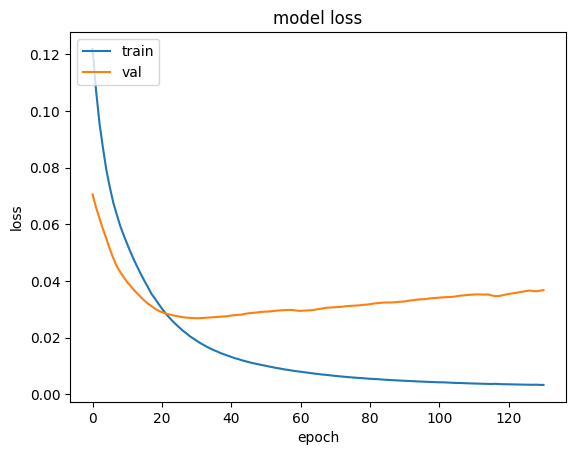

In [11]:

fig, ax = plt.subplots( nrows=1, ncols=1 ) # summarize history for loss
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_title('model loss')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(['train', 'val'], loc='upper left')
plt.show()

In [12]:
loaded_model = load_model('best_model.h5')
predictions = loaded_model.predict(X_test)
np.rint(y_sclaer.inverse_transform(predictions[:5])),y_sclaer.inverse_transform(y_test[:5])

1/1 [==============================] - 0s 33ms/step


(array([[-1.,  4., -3.],
        [ 3.,  1., -4.],
        [ 1.,  0., -1.],
        [-4.,  3., -4.],
        [-1.,  6., -4.]], dtype=float32),
 array([[  4.,   1.,  -5.],
        [  0.,   1.,  -5.],
        [  1.,   1.,   2.],
        [-10.,   0.,  -5.],
        [  1.,   3.,  -5.]]))

In [13]:
best_loaded_model = load_model('the_best.h5')
best_loss = best_loaded_model.evaluate(X_test, y_test)
print(f'Test Loss: {best_loss}')

1/1 [==============================] - 0s 32ms/step - loss: 0.0145
Test Loss: 0.014472114853560925


In [14]:
predictions[:5]

array([[0.46169266, 0.69418603, 0.174835  ],
       [0.63164896, 0.5665436 , 0.08186759],
       [0.54190356, 0.5043815 , 0.38721037],
       [0.29900774, 0.65524733, 0.08154245],
       [0.44782376, 0.78641605, 0.06485996]], dtype=float32)

In [15]:
predictions = best_loaded_model.predict(X_test)
np.rint(y_sclaer.inverse_transform(predictions[:5])),y_sclaer.inverse_transform(y_test[:5])

1/1 [==============================] - 0s 22ms/step


(array([[ 3.,  3., -5.],
        [ 3., -1., -5.],
        [ 3.,  4.,  3.],
        [-9., -0., -5.],
        [ 4.,  4., -4.]], dtype=float32),
 array([[  4.,   1.,  -5.],
        [  0.,   1.,  -5.],
        [  1.,   1.,   2.],
        [-10.,   0.,  -5.],
        [  1.,   3.,  -5.]]))

In [19]:
r2 = r2_score(y_test, predictions, multioutput='variance_weighted')
r2

0.5762966828863223

In [17]:
best_loaded_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                2752      
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 3)                 99        
                                                                 
Total params: 4931 (19.26 KB)
Trainable params: 4931 (19.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
if best_loss> loss: #save the best model
    model.save('the_best1.h5')
    plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
    fig.savefig('model loss.png')